<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/Chapter10/Chapter10_1_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-평균 알고리즘을 사용하여 유사한 객체 그룹핑

2차원 데이터셋 예제

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)

In [4]:
X.shape

(100, 2)

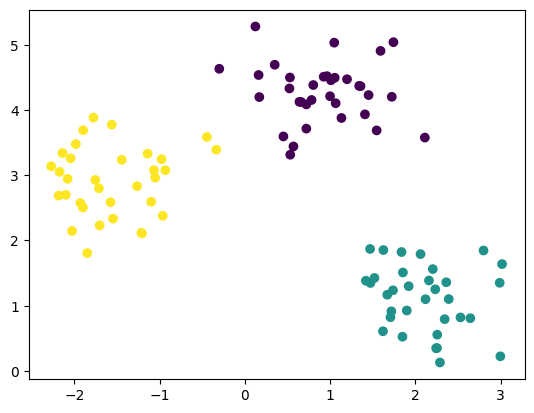

In [9]:
# 정답
import matplotlib.pyplot as plt

plt.scatter(X[:,0],
            X[:,1],
            c = y)
plt.show()

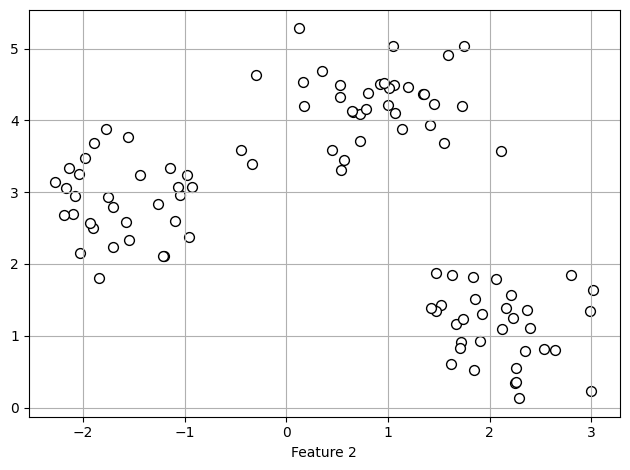

In [13]:
plt.scatter(X[:,0],
            X[:,1],
            c = 'white',
            marker = 'o',
            edgecolor = 'black',
            s = 50
            )
plt.xlabel('Feature 1')
plt.xlabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

실제 군집 애플리케이션에서는 샘플에 대한 진짜 카테고리 정보가 전혀 없음. 그러므로 여기에서 목표는 특성의 유사도에 기초하여 샘플을 그룹으로 모으는 것임.

## 사이킷런의 k-means 클러스터

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3,
                init = 'random', # init의 중요성에 관해서는 https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py 을 참고하자
                n_init = 10,
                max_iter = 300,
                tol = 1e-04,
                random_state = 0,)
y_km = kmeans.fit_predict(X)
y_km

array([2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [59]:
kmeans.labels_

array([2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [60]:
kmeans.inertia_

48.23520512521981

이제 데이터셋에서 k-평균이 식별한 클러스터와 클러스터 센트로이드를 함꼐 시각화해보자

In [23]:
# 클러스터 센트로이드는 다음과 같이 추출할 수 있다
kmeans.cluster_centers_

array([[-1.55605149,  2.90230638],
       [ 0.91471566,  4.26637114],
       [ 2.09729671,  1.12471414]])

In [ ]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 1, 1],
            s = 50, c = 'light')

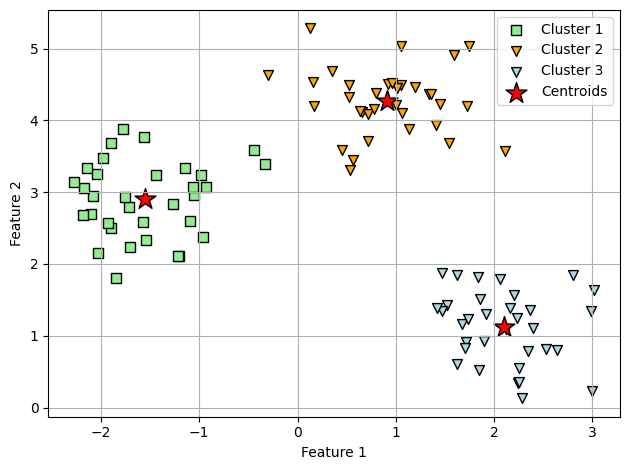

In [46]:
plt.scatter(X[y_km == 0,0],
            X[y_km == 0,1],
            s = 50, c = 'lightgreen',
            marker = 's', edgecolor = 'black',
            label = 'Cluster 1')
plt.scatter(X[y_km == 1,0],
            X[y_km == 1,1],
            s = 50, c = 'orange',
            marker = 'v', edgecolor = 'black',
            label = 'Cluster 2')
plt.scatter(X[y_km == 2,0],
            X[y_km == 2,1],
            s = 50, c = 'lightblue',
            marker = 'v', edgecolor = 'black',
            label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 250, c = 'red',
            marker = '*', edgecolor = 'black',
            label = 'Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

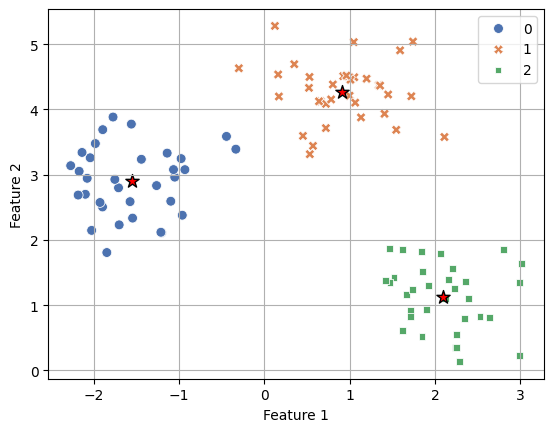

In [54]:
# seaborn 으로 다음같이 그릴 수도 있다.

import seaborn as sns
sns.scatterplot(x = X[:,0], y  = X[:,1], hue = y_km, style=y_km, palette = 'deep', s = 50)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 100, c = 'red',
            marker = '*', edgecolor = 'black',
            label = 'Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

# k-means++

In [61]:
kmeans = KMeans(n_clusters = 3,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                tol = 1e-04,
                random_state = 0,)
y_km = kmeans.fit_predict(X)
y_km

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0], dtype=int32)

In [62]:
kmeans.inertia_

48.23520512521981

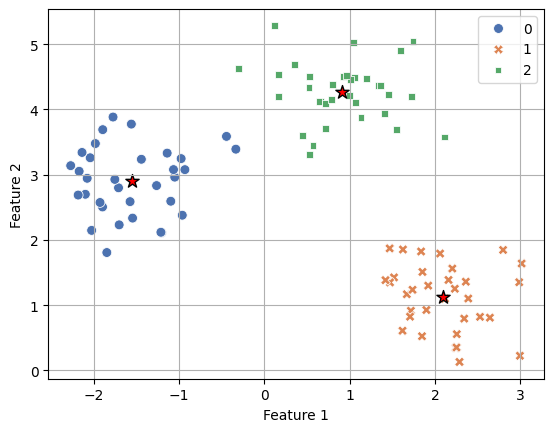

In [63]:
import seaborn as sns
sns.scatterplot(x = X[:,0], y  = X[:,1], hue = y_km, style=y_km, palette = 'deep', s = 50)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 100, c = 'red',
            marker = '*', edgecolor = 'black',
            label = 'Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

결과는 같았다.

# 엘보우 방법

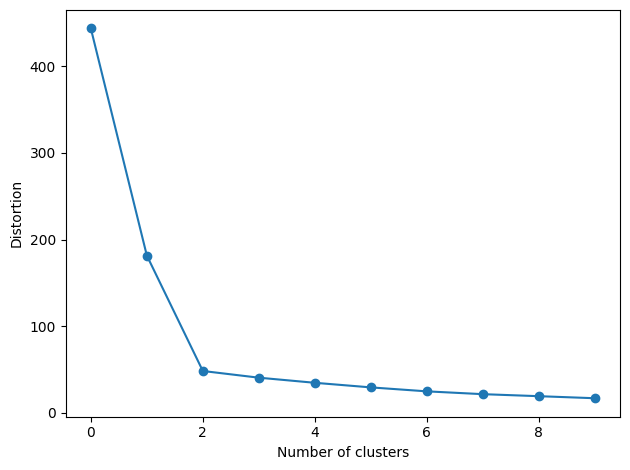

In [65]:
distortions = []

for num_cluster in range(1, 11):
  kmeans = KMeans(
      n_clusters = num_cluster,
      init = "k-means++",
      n_init = 10,
      max_iter = 300,
      random_state = 0
  )
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

plt.plot(distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# 실루엣 그래프

In [67]:
km = KMeans(
    n_clusters = 3,
    init = "k-means++",
    n_init = 10,
    max_iter = 300,
    tol = 1e-04,
    random_state = 0
)

y_km  = km.fit_predict(X)

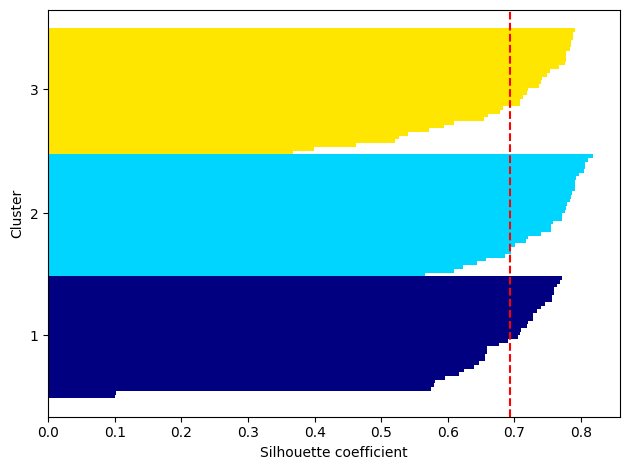

In [75]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric = 'euclidean'
)

y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height = 1.0,
           edgecolor = 'none',
           color = color)
  yticks.append( (y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
            color = 'red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


실루엣 계수의 값이 0 에 가깝지 않고, 평균 실루엣 점수로부터 거의 비슷하게 떨어져 있으므로, 군집이 잘 되었다는 것을 알 수 있음.

나쁜 군집에 대해 실루엣 그래프가 어떻게 보이는지 알아보자

In [78]:
km = KMeans(n_clusters = 2,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

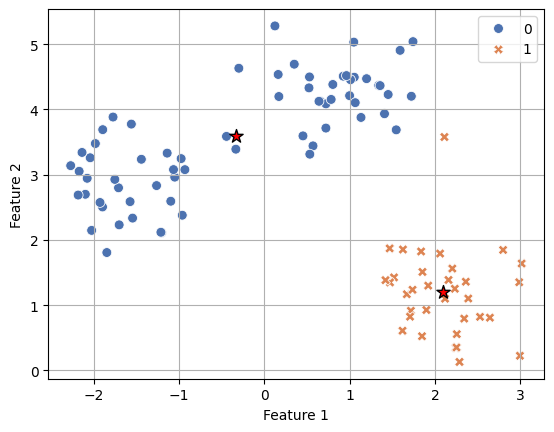

In [80]:
import seaborn as sns
sns.scatterplot(x = X[:,0], y  = X[:,1], hue = y_km, style=y_km, palette = 'deep', s = 50)
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s = 100, c = 'red',
            marker = '*', edgecolor = 'black',
            label = 'Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

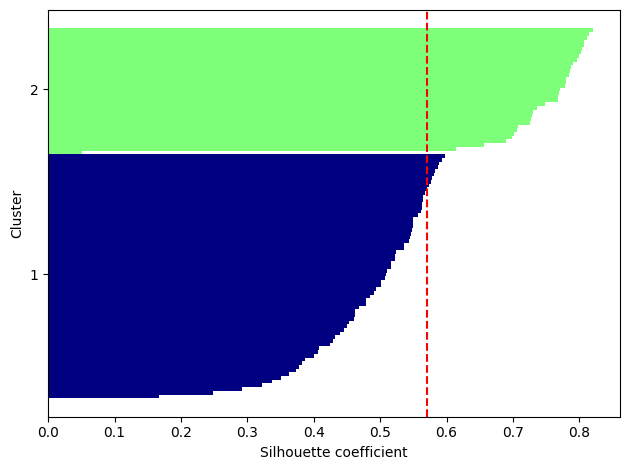

In [81]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric = 'euclidean'
)

y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height = 1.0,
           edgecolor = 'none',
           color = color)
  yticks.append( (y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
            color = 'red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


만들어진 실루엣 그래프에서 길이와 두께가 확연히 다름. 이는 군집 결과가 나쁘거나 적어도 최적은 아니라는 증거임.